# Part I - prosperLoanData Exploration
## by Opeyemi Fasasi

## Introduction
> This data set contains information about loans, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
#ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#import dataset and show top rows
df = pd.read_csv('https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv')

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#show the rows and columns
df.shape

(113937, 81)

The dataset has 113,937 rows and 81 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

Rename ProsperRating (numeric), ProsperRating (Alpha), TradesNeverDelinquent (percentage)  and ListingCategory (numeric)  columns.

Convert ListingNumber to string datatype, ListingCreationDate to datetime, ClosedDate to datetime, ProsperRating (numeric) to  category, ProsperRating_alpha to category,  LoanNumber to string and LoanOriginationDate  to datetime 

In [6]:
#rename the listed columns 

df.rename(columns = {'ProsperRating (numeric)':'ProsperRating_num', 'ProsperRating (Alpha)':'ProsperRating_alpha', 
                        'ListingCategory (numeric)': 'ListingCategory_num'},inplace=True)

In [7]:
#change datatypes
df.ListingNumber = df.ListingNumber.astype('str')
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)
df['ProsperRating_num'] = df['ProsperRating_num'].astype('category')
df['ProsperRating_alpha'] =df['ProsperRating_alpha'].astype('category')
df['LoanNumber'] = df['LoanNumber'].astype('str')
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [8]:
#check if the changes have been effected

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null object
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating_num                      84853 non-null category
Pros

Select the data needed for the purpose of this analysis

In [9]:
#list all columns in the dataset
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating_num', 'ProsperRating_alpha',
       'ProsperScore', 'ListingCategory_num', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCre

In [10]:
#select the columns needed for analysis
col = ['ListingKey', 'ListingNumber', 'ListingCreationDate',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerRate',
       'LenderYield', 'ProsperRating_num', 'ProsperRating_alpha',
       'ProsperScore', 'ListingCategory_num', 'BorrowerState',
       'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'CurrentCreditLines', 'OpenCreditLines',
       'CurrentDelinquencies', 'AmountDelinquent',
       'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanNumber', 
       'LoanOriginalAmount',
       'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount','Investors']

df_new = df[col]

In [11]:
#check for the minimum and maximum date - I want to drop off listings before July 2009 
print(min(df_new.LoanOriginationDate))
print(max(df_new.LoanOriginationDate))

df_09 = df_new[df_new['LoanOriginationDate'] >= '2009-07-01']

2005-11-15 00:00:00
2014-03-12 00:00:00


In [12]:
#pick only the data where ProsperRating_num is not empty
df_09 = df_09[~df_09['ProsperRating_num'].isna()]

In [13]:
#see sample 
df_09.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,LenderYield,ProsperRating_num,ProsperRating_alpha,...,StatedMonthlyIncome,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
20911,B43B3601740951060321F55,1187582,2014-02-10 13:23:55.640,60,Current,NaT,0.1970,0.1870,4.0,C,...,8425.000000,131450,20000,2014-02-12,Q1 2014,526.54,0,0,0.0,1
68638,3ED435040682334986F4094,489208,2010-12-27 22:57:39.427,36,Completed,2014-01-06,0.2140,0.2040,4.0,C,...,5833.333333,46441,7000,2011-01-06,Q1 2011,265.17,0,0,0.0,95
28766,BE4A353159180810338E0CB,539397,2011-11-16 13:05:02.210,36,Completed,2012-07-25,0.1619,0.1519,5.0,B,...,19583.333333,56271,11000,2011-11-22,Q4 2011,387.76,0,0,0.0,28
65670,5A21359382765489911AD70,972005,2013-10-28 07:58:16.130,60,Current,NaT,0.1485,0.1385,5.0,B,...,4500.000000,108856,11000,2013-10-30,Q4 2013,260.82,0,0,0.0,158
75485,C8863525949109225488492,528368,2011-09-20 10:24:05.157,36,Completed,2012-07-17,0.1390,0.1290,6.0,A,...,6916.666667,54192,11000,2011-10-06,Q4 2011,375.42,0,0,0.0,117


In [14]:
#show the rows and columns of the new dataset
df_09.shape

(84853, 33)

In [15]:
#see the information about the dataset
df_09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 33 columns):
ListingKey                     84853 non-null object
ListingNumber                  84853 non-null object
ListingCreationDate            84853 non-null datetime64[ns]
Term                           84853 non-null int64
LoanStatus                     84853 non-null object
ClosedDate                     26005 non-null datetime64[ns]
BorrowerRate                   84853 non-null float64
LenderYield                    84853 non-null float64
ProsperRating_num              84853 non-null category
ProsperRating_alpha            84853 non-null category
ProsperScore                   84853 non-null float64
ListingCategory_num            84853 non-null int64
BorrowerState                  84853 non-null object
EmploymentStatus               84853 non-null object
EmploymentStatusDuration       84834 non-null float64
IsBorrowerHomeowner            84853 non-null bool
CurrentlyInGroup      

### df_09 will be used for exploration.
- it contains 84853 rows and 33 columns 
- The feature of interest is ProsperRating_num
- The variables in df_09 excluding ProsperRating_num and ProsperRating_alpha will be used for investigation

## Univariate Exploration

### QUESTION 1: How many loans fall into each ProsperRating?

In [16]:
#define functions

def title(t):
    #give title to my chart
    plt.title(t)

def xlabel(x):
    #label the x-axis
    plt.xlabel(x)

def ylabel(y):
    #label the y-axis
    plt.ylabel(y)

def countplot(dt, var, color, title, xaxis, yaxis):
    #create a countplot
    sb.countplot(data=dt,x=var,color=color)
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    

##### VISUALIZATION

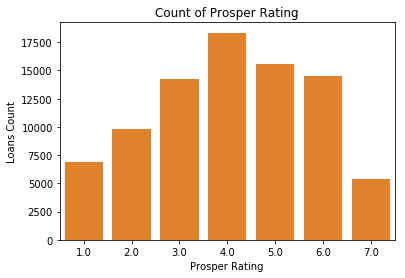

In [17]:
#define the color of the chart
base_color = sb.color_palette()[1]

#create a countplot
countplot(df_09,'ProsperRating_num', base_color,'Count of Prosper Rating', 'Prosper Rating', 'Loans Count')

###### OBSERVATION: The modal ProsperRating is 4. Rating 7 has the least number of listings.

### QUESTION 2: What is the majority loan status?

##### VISUALIZATION:

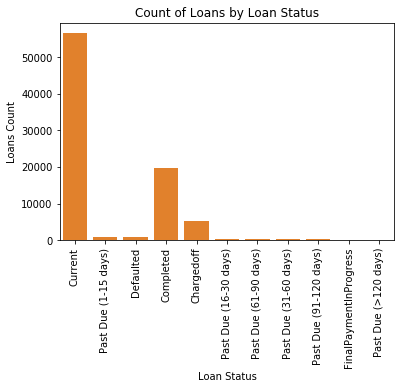

In [18]:
#create a countplot
countplot(df_09,'LoanStatus', base_color,'Count of Loans by Loan Status', 'Loan Status', 'Loans Count')
plt.xticks(rotation=90);

##### OBSERVATION: More than 50,000 loans are current and about 20,000 loans are completed

### QUESTION 3: What is the term for most of our loans?

##### VISUALIZATION:

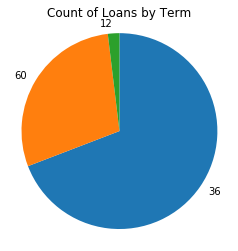

In [19]:
#get the count of looans for each term
sorted_counts = df_09['Term'].value_counts()

#plot a pie chart
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
title('Count of Loans by Term');

##### OBSERVATION: Majority of our loans runs for 36 months - taking about 69%

### QUESTION 4: What is the distribution across employment status?

##### VISUALIZATION:

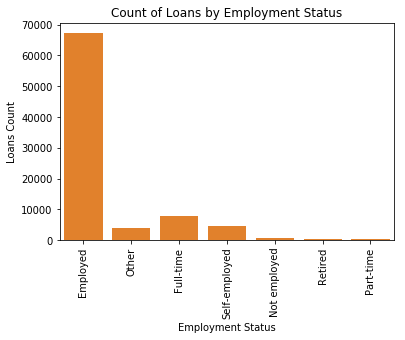

In [20]:
#create a countplot
countplot(df_09,'EmploymentStatus', base_color,'Count of Loans by Employment Status', 'Employment Status', 'Loans Count')
plt.xticks(rotation=90);

##### OBSERVATION: Majority of loan takers are employed while the least loan takers are part-time workers. 

### QUESTION 5: What is the modal IncomeRange?

##### VISUALIZATION: 

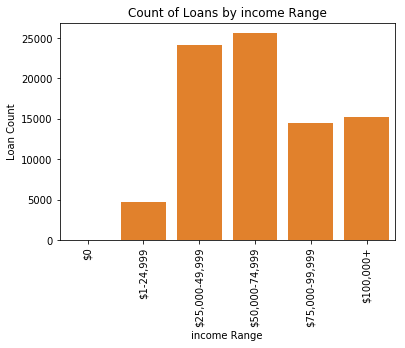

In [21]:
#plot a countplot
income_order = [f'$0', "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", f'$100,000+']
sb.countplot(data= df_09, x='IncomeRange', color = base_color, order= income_order)
plt.xticks(rotation=90)

title('Count of Loans by income Range')
xlabel('income Range')
ylabel('Loan Count')

##### OBSERVATION: The top three income range are 50,000-74,999, 25000-49,999 and 100,000+

### QUESTION 6: What is the distribution of the Loan Original Amount?

##### VISUALIZATION:

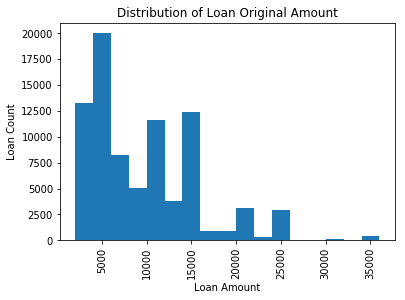

In [22]:
bins =  np.arange(2000, df_09['LoanOriginalAmount'].max()+2000, 2000)
plt.hist(data = df_09, x = 'LoanOriginalAmount', bins= bins)

plt.xticks(rotation=90)
title('Distribution of Loan Original Amount')
xlabel('Loan Amount')
ylabel('Loan Count')

OBSERVATION: The distribution is right skewed. The modal amount lies between 4,000-6,000

#### From the dataset, it was observed that the Prosper Rating is uniformly distributed with the mode being rating 4 and rating 7 being the least represented in the dataset. Checking the tatus of the loans collected, it was also observed that most loans fall under the current category to signify that most loans are still active. An overwhelming majority of loans were observed to be medium term in nature falling under the 36 month timeline. Short term loans are the lowest loans taken by the group observed. A short exploration into the trend of employment status of the dataset showed that most of the individuals in the dataset are employed with part-time workers being the least represented.

#### Additionally, it was observed that that the modal income group in the observation fell between 50000  to 79999 followed closely by 25k to 49.99k. In terms of Loan original amount,it was observed that the distribution is right skewed with the modal amount lying between 4000 and 6000

## Bivariate Exploration

### QUESTION 7: What is the relationship between ProsperRating and LoanOriginalAmount?

VISUALIZATION: 

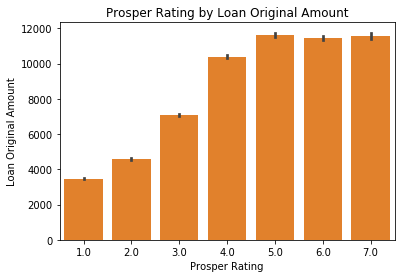

In [23]:
#plot a barplot
sb.barplot(data=df_09, x='ProsperRating_num', y='LoanOriginalAmount', color=base_color)
title('Prosper Rating by Loan Original Amount')
xlabel('Prosper Rating')
ylabel('Loan Original Amount');

##### OBSERVATION:It was observed that there is a positive relationship between Prosper Rating and LoanOriginalAmount. The marginal increase goes below zero as the prosper rating grows from 5-6

### QUESTION 8: What is the relationship between LoanOriginalAmount and MonthlyLoanPayment?

VISUALIZATION:

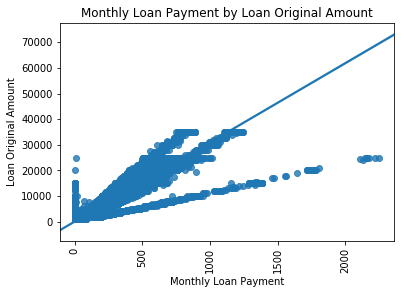

In [24]:
#plot a regplot
sb.regplot(data = df_09, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount')
plt.xticks(rotation=90)
title('Monthly Loan Payment by Loan Original Amount')
xlabel('Monthly Loan Payment')
ylabel('Loan Original Amount');

OBSERVATION: This shows there is a positive correlation between the two variables

### QUESTION 9: How does the MonthlyLoanPayment impact ProsperRating?

VISUALIZATION:

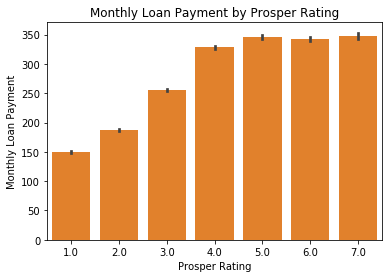

In [25]:
#plot a barplot
sb.barplot(data=df_09, x='ProsperRating_num', y='MonthlyLoanPayment', color=base_color)
title('Monthly Loan Payment by Prosper Rating')
xlabel('Prosper Rating')
ylabel('Monthly Loan Payment');

##### OBSERVATION:It was observed that there is a positive relationship between Prosper Rating and MonthlyLoanPayment. The marginal increase goes below zero as the prosper rating grows from 5-6

### QUESTION 10: What is the proportion of IsBorrowerHomeOwner for each current loans' rating?

VISUALIZATION:

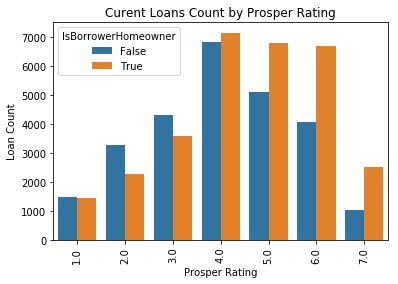

In [26]:
#create a dataframe containing only current loans
df_current = df_09[df_09['LoanStatus']== 'Current']

#plot a countplot
sb.countplot(data = df_current, x = 'ProsperRating_num' , hue = 'IsBorrowerHomeowner' )
plt.xticks(rotation=90)
title('Curent Loans Count by Prosper Rating')
xlabel('Prosper Rating')
ylabel('Loan Count');

##### OBSERVATION: For ratings 4 to 7, the number of current loans takers who are home owners is more while for ratings 1 to 3, the number of current loan takers is less than home owners .

### QUESTION 11: What is the modal income range for each rating?

VISUALIZATION:

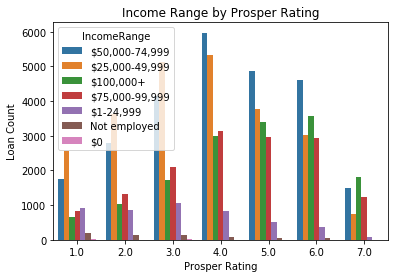

In [27]:
#plot a countplot of income range for prosper rating
sb.countplot(data = df_09, x = 'ProsperRating_num' , hue = 'IncomeRange')
title('Income Range by Prosper Rating')
xlabel('Prosper Rating')
ylabel('Loan Count');

##### OBSERVATION: For range 1,2 and 3, the modal Income Range is 25,000-49,999 where the modal income range is 50,000-74,999 for rating 4,5,6 and 7

### QUESTION 12: What is the modal term for each IncomeRange of current loan takers?

VISUALIZATION:

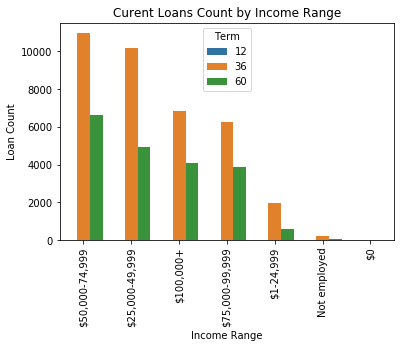

In [28]:
#plot a countplot
sb.countplot(data = df_current, x = 'IncomeRange' , hue = 'Term' )
plt.xticks(rotation=90)
title('Curent Loans Count by Income Range')
xlabel('Income Range')
ylabel('Loan Count');

OBSERVATION: Majority of loan takers regardless of their income range take loans for a period of 36 months


#### Bivariate analysis was carried out to see the relationship between Prosper Ratings, Borrowers, and homeowners. It was discovered that for prosper ratings 1 to 3, more borrowers were non-homeowners than homeowners while for Prosper ratings between 4 to 7, more borrowers were homeowners than non-homeowners. This can infer that a higher likelihood of home ownership as prosper ratings increased. 

#### Finally, For range 1,2 and 3, the modal Income Range is 25,000-49,999 where the modal income range is 50,000-74,999 for rating 4,5,6 and 7. 

## Multivariate Exploration

### QUESTION 13:

VISUALIZATION

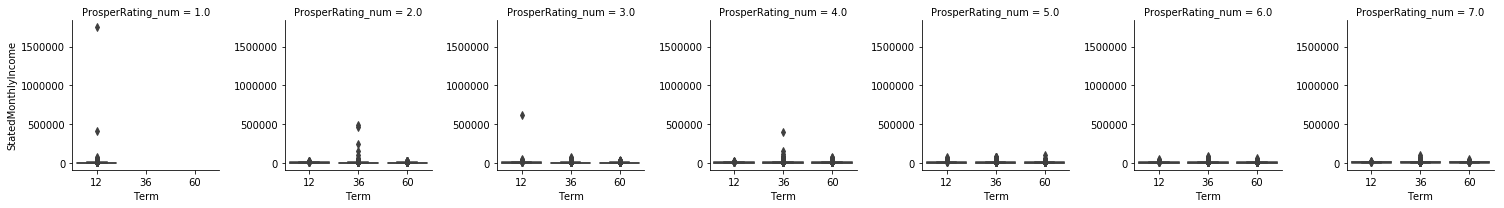

In [29]:
#plot boxplot of statedmontlyincome for each rating
g = sb.FacetGrid(data = df_09, col = 'ProsperRating_num')
g.map(sb.boxplot, 'Term', 'StatedMonthlyIncome');

OBSERVATION: There seems to be a similarity in behaviour for rating 2 and 4. Also rating 6 and 7.

### QUESTION 14: What does the correlation between LoanOriginalAmount and  MonthlyLoanPayment look like for each Term?

VISUALIZATION:

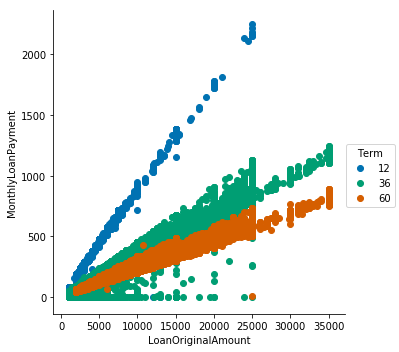

In [30]:
#plot LoanOriginalAmount against MonthlyLoanPayment using Term to distinguish
g = sb.FacetGrid(data = df, hue = 'Term', size = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend();

OBSERVATION: The LoanOriginalAmount and MonthlyLoanPayment are closely correlated for Term 60 than other terms.

### QUESTION 15: What is the correlation among the data variables?

VISUALIZATION:

In [31]:
#plot heatmap to show correlation
df_09.corr().style.background_gradient(cmap ='coolwarm')

,Term,BorrowerRate,LenderYield,ProsperScore,ListingCategory_num,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CurrentCreditLines,OpenCreditLines,CurrentDelinquencies,AmountDelinquent,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1,-0.000118303,-8.63627e-05,0.0289465,-0.0632685,0.0525555,0.0760607,-0.0437445,0.0712813,0.0828423,-0.0437786,-0.0157932,0.0663956,0.00925742,0.339117,0.0550204,-0.0303381,-0.0324626,-0.015878,0.0125503
BorrowerRate,-0.000118303,1,0.999996,-0.649736,0.103641,-0.039182,-0.12618,0.0114085,-0.107962,-0.12596,0.149515,0.0521442,-0.113667,-0.0934808,-0.413466,-0.331021,-0.00907027,-0.015313,0.00124337,-0.242281
LenderYield,-8.63627e-05,0.999996,1,-0.649783,0.103647,-0.0391704,-0.126173,0.0113992,-0.107967,-0.12596,0.149517,0.0521495,-0.113664,-0.0934774,-0.413422,-0.330978,-0.00906437,-0.0153084,0.0012457,-0.242326
ProsperScore,0.0289465,-0.649736,-0.649783,1,-0.00971788,-0.00730211,0.0644378,0.030032,-0.00849746,-0.00160898,-0.100612,-0.0416006,0.154619,0.0837567,0.266293,0.175425,0.0266576,0.0283434,0.00313104,0.320594
ListingCategory_num,-0.0632685,0.103641,0.103647,-0.00971788,1,-0.0360611,-0.0743412,0.00235164,-0.133393,-0.143579,0.0622006,0.0297571,-0.0199932,-0.0156706,-0.202322,-0.187604,-0.00041438,-0.00481246,-0.00329502,-0.0450526
EmploymentStatusDuration,0.0525555,-0.039182,-0.0391704,-0.00730211,-0.0360611,1,0.155987,-0.0132406,0.127081,0.120217,0.0222815,0.00825384,0.0384321,0.0513804,0.0782167,0.0630132,-0.00663222,-0.013835,-0.00414587,-0.0200454
IsBorrowerHomeowner,0.0760607,-0.12618,-0.126173,0.0644378,-0.0743412,0.155987,1,-0.00795583,0.255658,0.253553,0.00944107,0.0456162,0.0905556,0.120302,0.177856,0.143371,-0.00307992,0.000432243,0.00527296,0.100747
CurrentlyInGroup,-0.0437445,0.0114085,0.0113992,0.030032,0.00235164,-0.0132406,-0.00795583,1,-0.010756,-0.0181661,0.0331279,0.0109216,-0.0313276,-0.00541734,-0.0502552,-0.0443312,0.155672,0.121057,0.0455288,0.0527217
CurrentCreditLines,0.0712813,-0.107962,-0.107967,-0.00849746,-0.133393,0.127081,0.255658,-0.010756,1,0.963324,-0.131527,-0.063385,0.0503745,0.127176,0.192962,0.175042,0.00885573,-0.00599909,-0.00586848,0.0159669
OpenCreditLines,0.0828423,-0.12596,-0.12596,-0.00160898,-0.143579,0.120217,0.253553,-0.0181661,0.963324,1,-0.12714,-0.0623287,0.0460735,0.123542,0.214023,0.193023,0.00147883,-0.00973673,-0.00683951,0.010797


OBSERVATION: BorrowerRate and LenderYield are highly positively correlated. Same with CurrentCreditLines and OpenCreditLines. Also, LoanOriginalAmount and MonthlyLoanPayment are correlated.

#### A correlation analysis was carried out on the dataset to identify possible relationships between the variables in the dataset. It was observed that Monthly Loan Payment is highly positively correlated with the Loan original Amount. This is to be expected as a higher loan amount is expected to lead to a higher monthly repayment. Likewise, it was observed that the Lender yield is also positively correlated with the borrower rate. Like the case of monly payment and original loan amount, it is also expected that a higher borrower rate would lead to a higher lender yield and vice versa. 

#### The Prosper score was observed to be negatively correlated with the Lender Yield and Borower Rate. Again, by paying a lower rate, it is expected that the ProsperRate would be higher. Likewise, since we already know that a higher borrower rate increases LenderYield, we can also conclude that a higher Lenderyield would negatively impact Score. This is stongly supported by the correlation score discussed earlier.

#### Finally it was observed that Current Credit lines is highly positively correlated with Open crediti lines and as such a higher Current Credit line would lead to a higher open credit Line and Vice Versa. 

## Conclusion
I imported the dataset, did some wrangling processes to rename columns, change datatypes and selected the features necessary for my analysis. 
I selected the ProsperRating (numeric) variable as my target feature and looked at its relationship with some variables like LoanOriginalAmount, IncomeRange, LoanStatus, Term etc. 

Some of the findings are:
- Majority of the loan takers have prosper rating 4.
- The loan amount and monthly payment are highly positively correlated which means as loan amount increases, the monthly payment increases too.
- The loan amount isn't really dependent on the stated monthly income and income range